# Repetition from the previous exercise
Load example image, e.g.: `img = data.coffee()`, and convert it into the grayscale ("L").

## Code (scroll down)
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>
   <br>

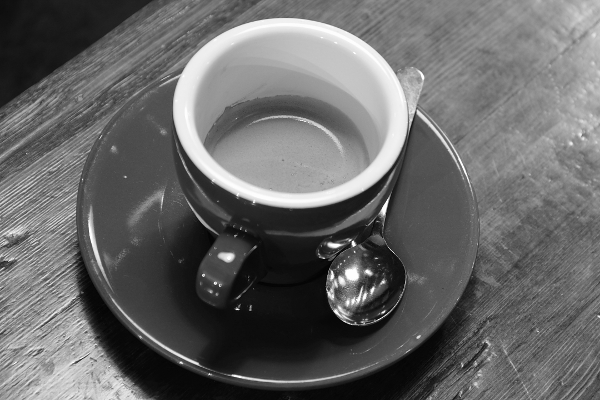

In [1]:
from skimage import data

# The complete code will be provided during the exercise
img = None       # RGB image
img_gray = None  # grayscale image

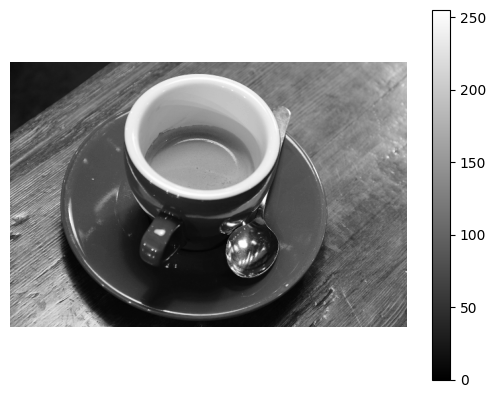

In [2]:
import matplotlib.pyplot as plt

# Display the image with a colorbar
plt.imshow(img_gray, cmap='gray')  # pass the image to the matplotlib
plt.axis('off')                    # hide axes for a cleaner display
plt.colorbar()                     # show colorbar
plt.show()                         # display the image

# Histogram
- histogram = representation of the distribution of pixel values in an image, showing how frequently each intensity level (or color) occurs.
- **Relative** histogram = normalized by the total number of pixels, i.e., the area (width * height) of the image. This shows the **probability** of each pixel value occurring in the image.
- **Cumulative** histogram = cumulative sum of pixel counts up to each bin, representing the **distribution** of pixel values.
- **Cumulative relative** histogram = cumulative histogram with frequencies normalized by the total number of pixels, representing the **probability distribution**.

In [3]:
import numpy as np

# Convert image to 1D list of pixel values
img_flatten = np.array(img_gray).flatten()
img_flatten.shape

(240000,)

**Note:**

You can also use `ravel()` instead of `flatten()`, which is more memory efficient - it returns view if possible, while `flatten` always returns a copy.

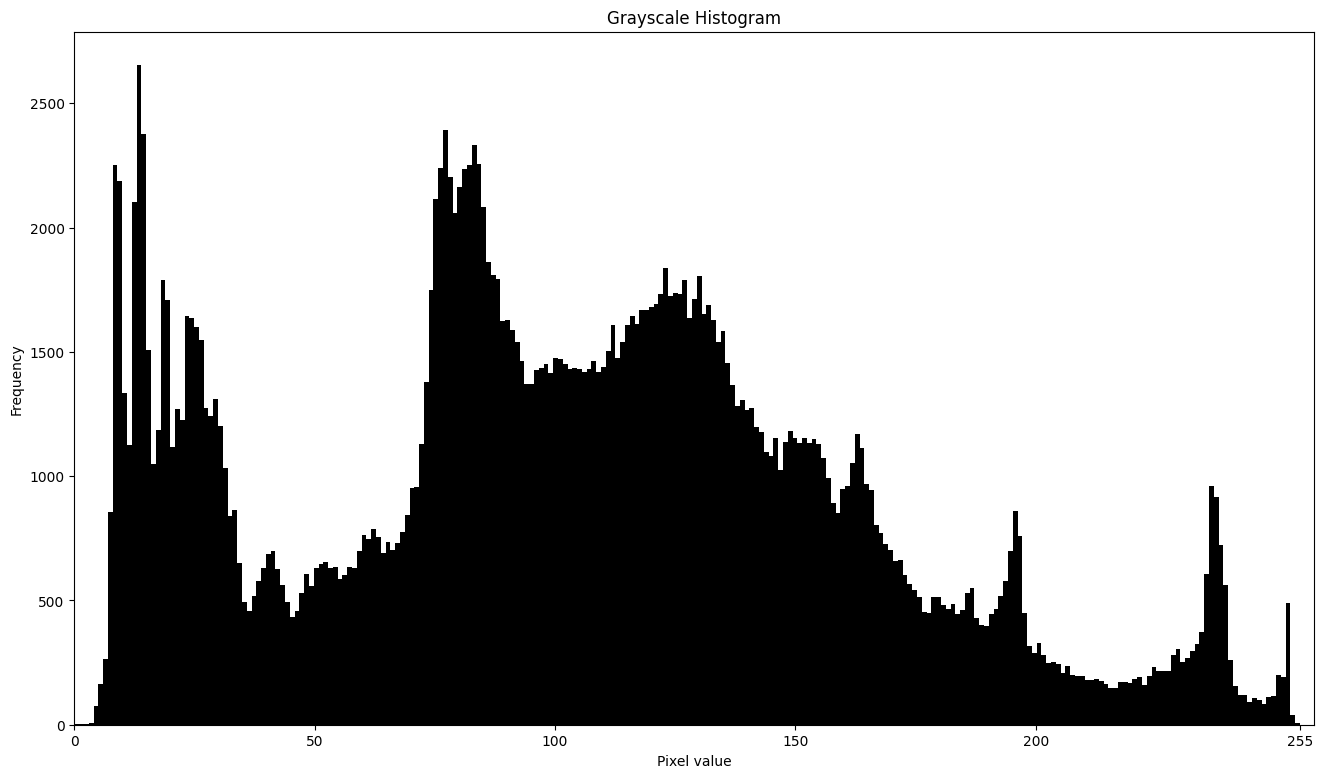

In [4]:
# Set the figure (optional)
plt.figure(figsize=(16, 9))

# The complete code will be provided during the exercise

# Set optional parameters for the figure
plt.xlim(0, 258)
plt.xticks([0, 50, 100, 150, 200, 255])
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Grayscale Histogram')

# show the figure
plt.show()

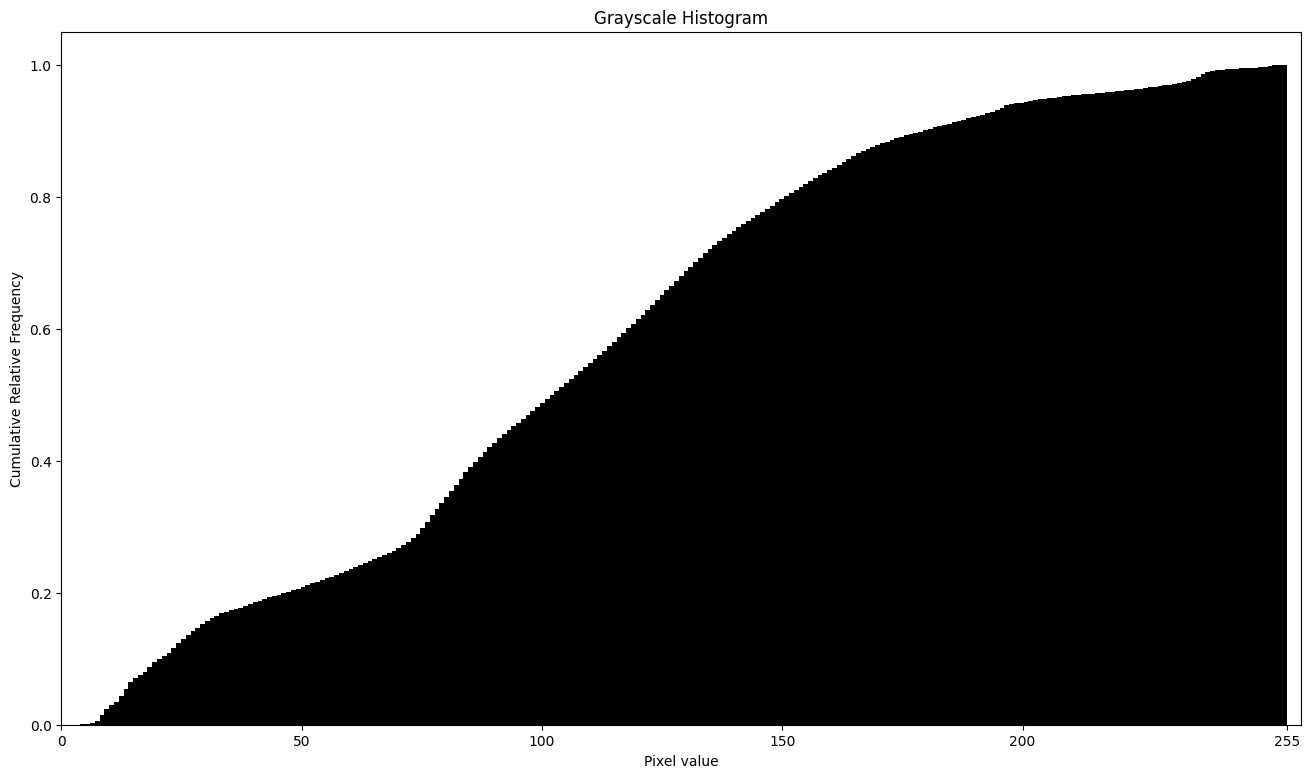

In [5]:
# Set the figure (optional)
plt.figure(figsize=(16, 9))

# The complete code will be provided during the exercise

# Set optional parameters for the figure
plt.xlim(0, 258)
plt.xticks([0, 50, 100, 150, 200, 255])
plt.xlabel('Pixel value')
plt.ylabel('Cumulative Relative Frequency')
plt.title('Grayscale Histogram')

# show the figure
plt.show()

**Note:**

It is also possible to get the counts using the `img_gray.histogram()` (`PIL` library).

## Histogram in HSV

When working with image processing, histograms are commonly used to analyze the distribution of pixel intensities. While grayscale histograms are useful for analyzing brightness, color images contain more information that can be represented in different color spaces.

One such color space is **HSV (Hue, Saturation, Value)**, which separates chromatic content (hue and saturation) from intensity (value). By analyzing histograms in HSV space, we can gain deeper insights into the color distribution of an image, which can be beneficial in various image processing applications, such as **color-based segmentation**.


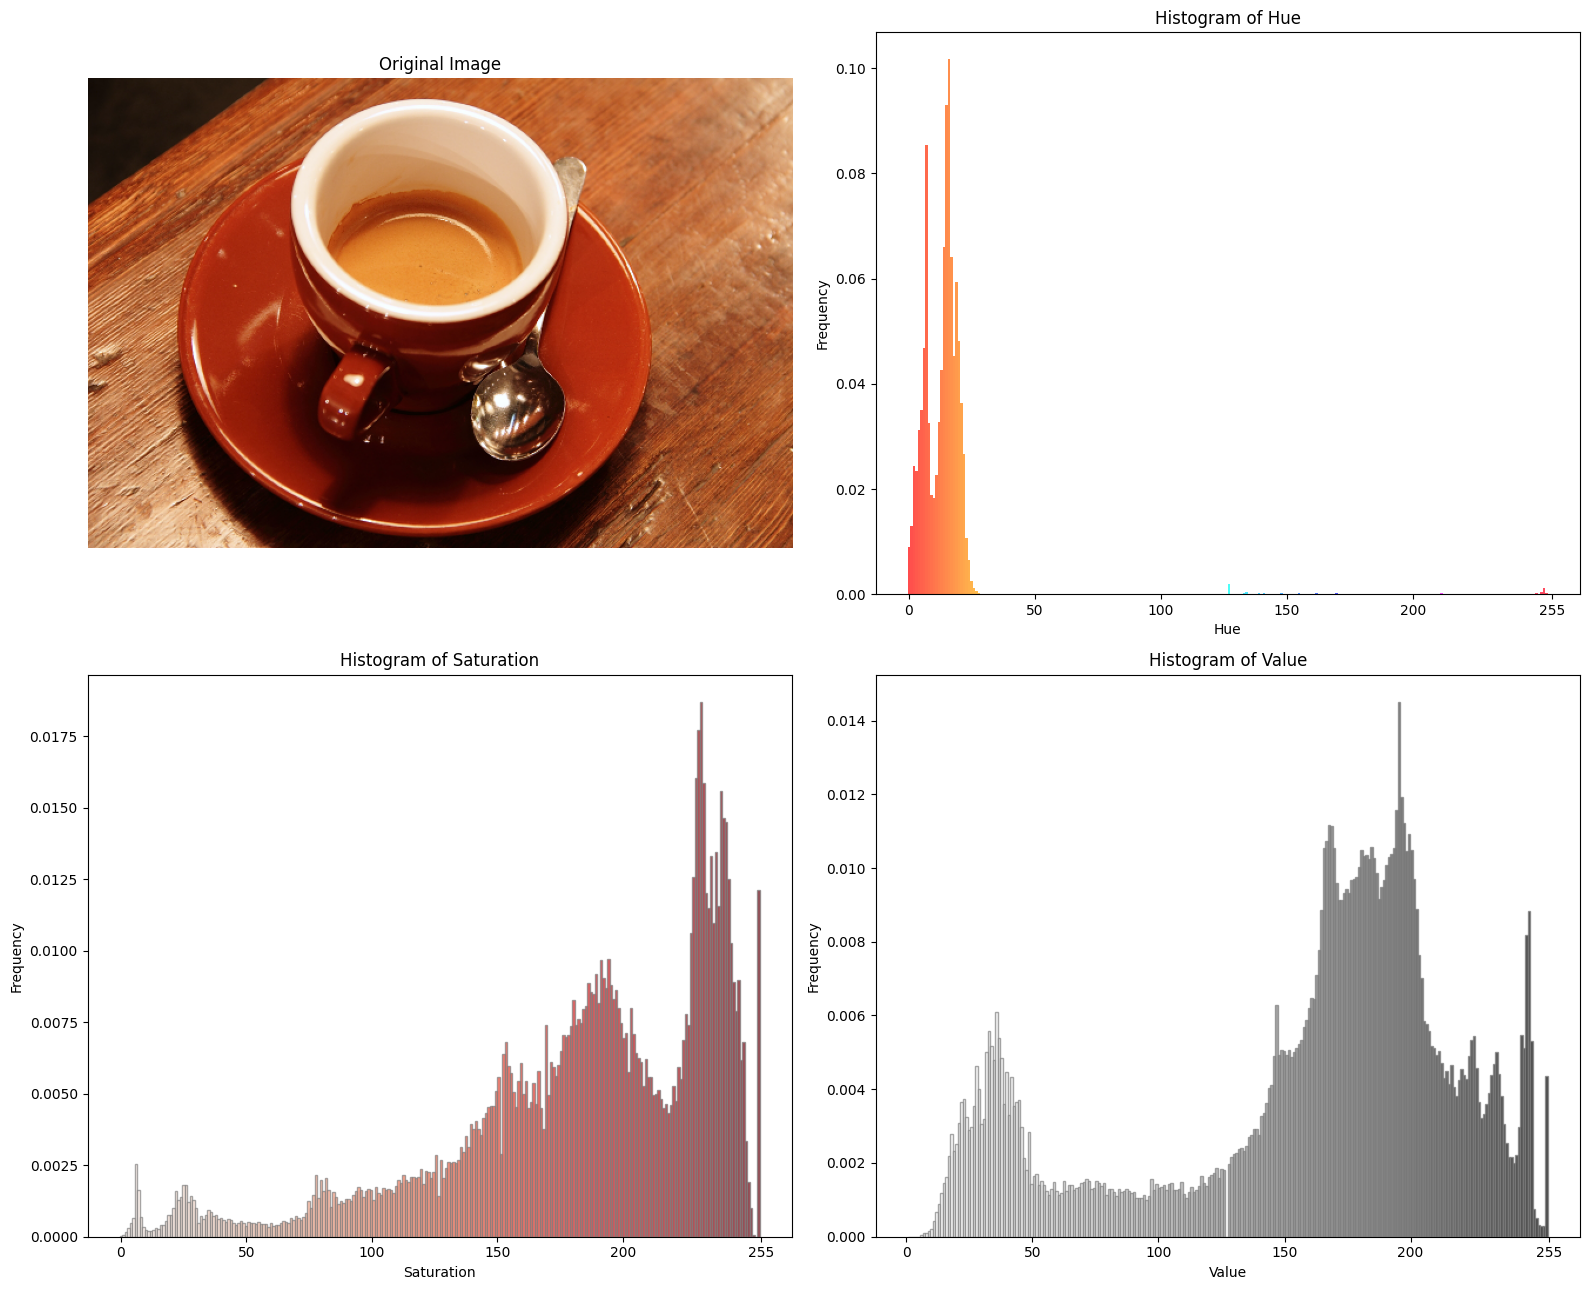

In [6]:
# The complete code will be provided during the exercise
hue = None         # Hue (color tone)
saturation = None  # Saturation (color intensity)
value = None       # Value (brightness)

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 13))

# Display the original image
axes[0, 0].imshow(img)
axes[0, 0].axis('off')
axes[0, 0].set_title('Original Image')

# Define common x-ticks
xticks = [0, 50, 100, 150, 200, 255]

# Histogram of Hue
counts_hue, bins_hue = np.histogram(hue.flatten(), bins=256, density=True)
colors_hue = plt.cm.hsv(np.linspace(0, 1, 256))   # HSV colors

axes[0, 1].bar(bins_hue[:-1], counts_hue, width=1, color=colors_hue, alpha=0.7)
axes[0, 1].set_xticks(xticks)
axes[0, 1].set_xlabel('Hue')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Hue')

# Histogram of Saturation
counts_sat, bins_sat = np.histogram(saturation.flatten(), bins=256, density=True)
colors_sat = plt.cm.Reds(np.linspace(0, 1, 256))  # red gradient

axes[1, 0].bar(bins_sat[:-1], counts_sat, width=1, color=colors_sat, alpha=0.7, edgecolor='gray')
axes[1, 0].set_xticks(xticks)
axes[1, 0].set_xlabel('Saturation')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Saturation')

# Histogram of Value
counts_val, bins_val = np.histogram(value.flatten(), bins=256, density=True)
colors_val = plt.cm.Greys(np.linspace(0, 1, 256))  # grayscale gradient

axes[1, 1].bar(bins_val[:-1], counts_val, width=1, color=colors_val, alpha=0.7, edgecolor='gray')
axes[1, 1].set_xticks(xticks)
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Value')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Brightness transformations

General formula to adjust image $ I $ brightness: $$ I' = \alpha \cdot I + \beta $$

Brightness adjustment:
- $ I' = I + b $, where $ b $ is a scalar to change the brightness.

Contrast adjustment:
- $ I' = I \cdot c $, where $ c $ is a scalar to change the contrast.
- Alternatively $ I' = (I - 127) \cdot c + 127 $ to center pixel values

Histogram equalization:  
![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Histogrammeinebnung.png/450px-Histogrammeinebnung.png)


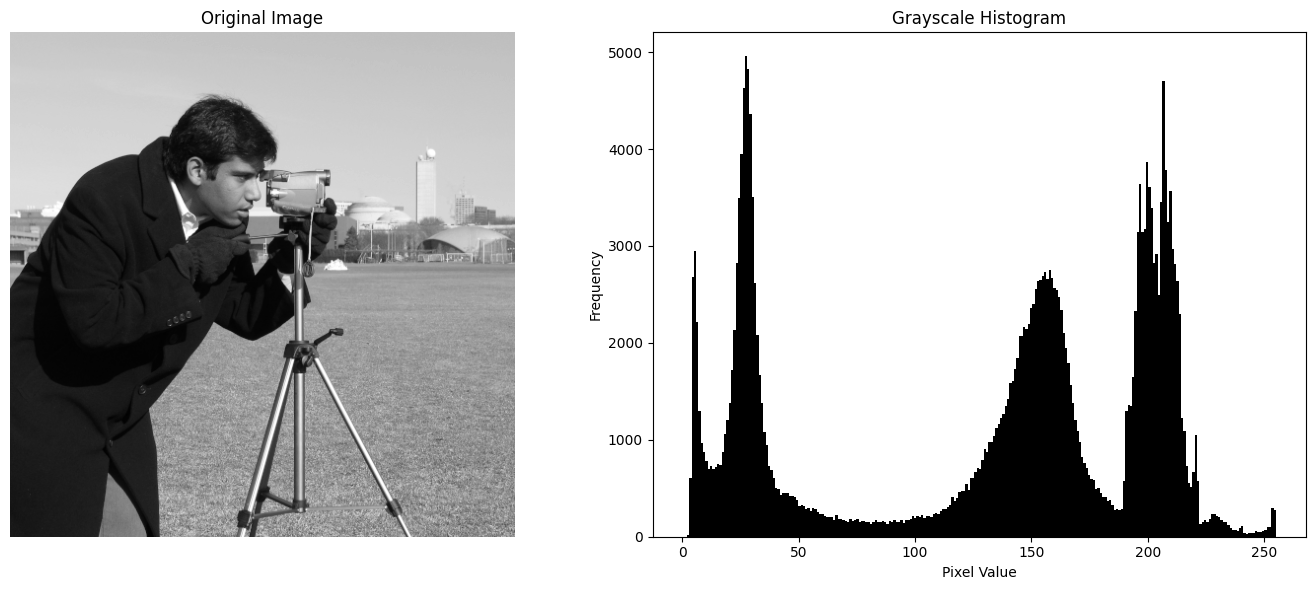

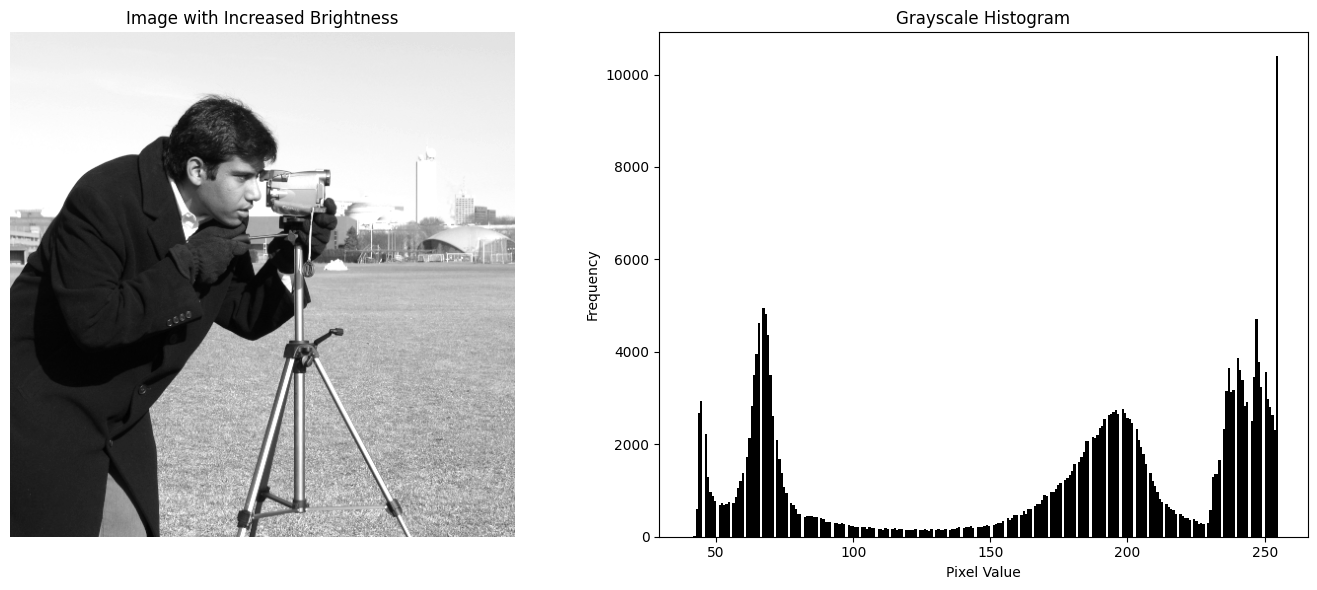

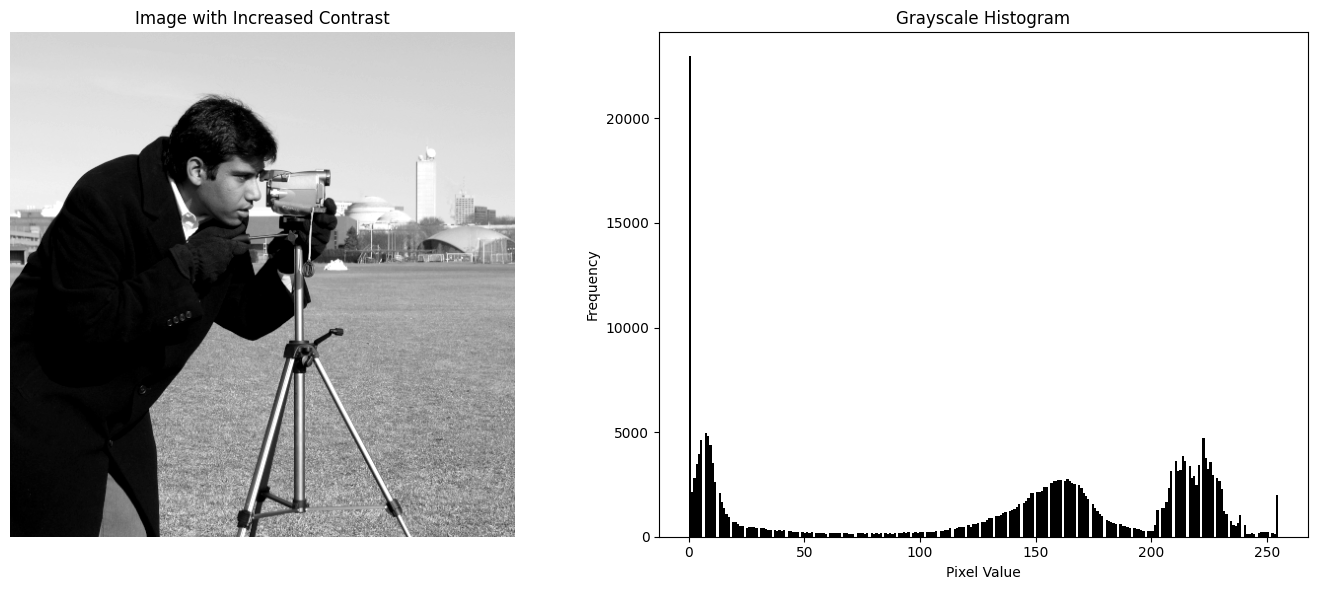

In [7]:
# Load an example image as numpy array, the camera is already in grayscale
img_gray = data.camera().astype('int16')  # convert dtype from unsigned int8 to int16 - needed for further operations

def plot_image_with_hist(img_gray, img_title, bins=256):
    # Ensure pixel values remain within range
    img_gray = np.clip(img_gray, 0, 255).astype('uint8')
    
    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Left - grayscale image
    axes[0].imshow(img_gray, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title(img_title)   
    
    # Right - histogram
    axes[1].hist(np.array(img_gray).ravel(), bins=bins, color='black', density=False)
    
    # Set limits and labels
    axes[1].set_xlabel('Pixel Value')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Grayscale Histogram')
    
    # Show the figure
    plt.tight_layout()
    plt.show()

# The complete code will be provided during the exercise

### Histogram Equalization (individual work)

**Objective:**
Apply histogram equalization to enhance the contrast of an image using `skimage.exposure.equalize_hist`.
In addition to performing histogram equalization, you must visualize side-by-side:
1. The original and equalized images.
2. The original and equalized histograms.

**Note:**
Ensure that the histograms have consistent axis labels and value ranges for proper comparison.

#### Code (scroll down)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

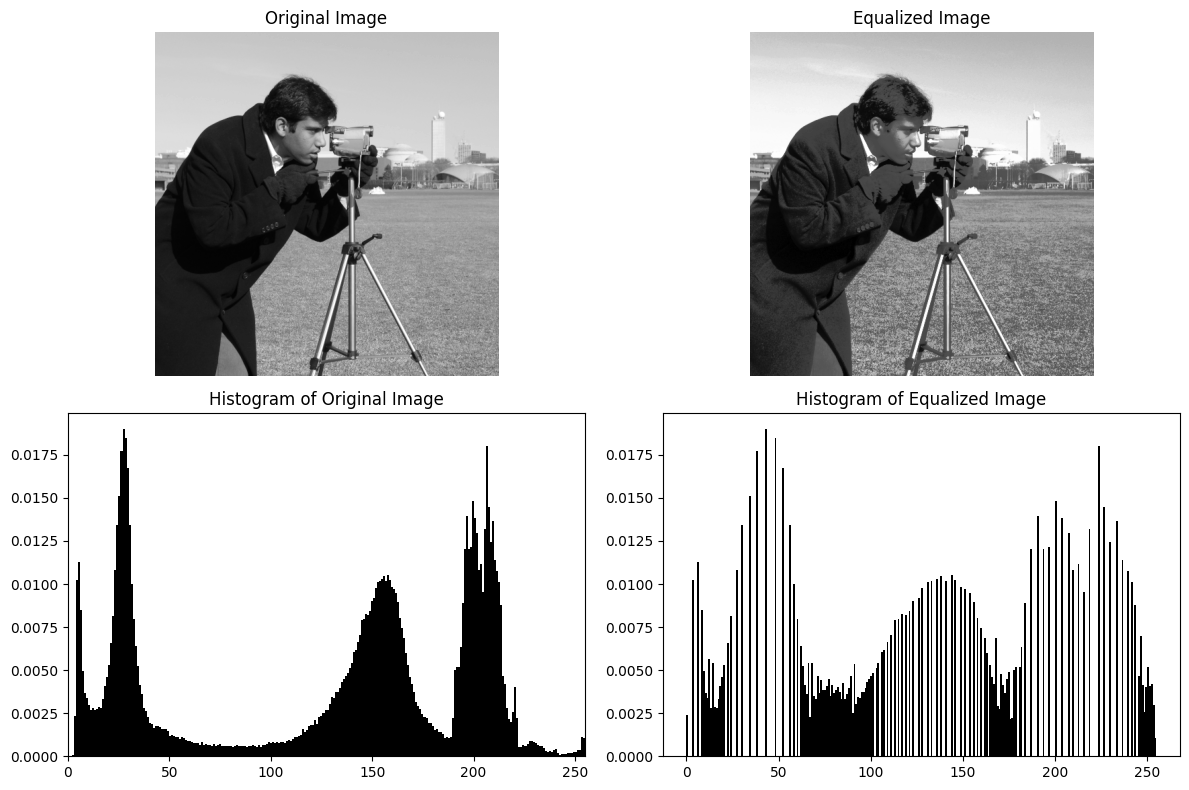

In [8]:
from skimage import exposure

# The complete code will be provided during the exercise
img_eq = None

# Plot the images and histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original image
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].axis('off')
axes[0, 0].set_title('Original Image')

# Equalized image
axes[0, 1].imshow(img_eq, cmap='gray')
axes[0, 1].axis('off')
axes[0, 1].set_title('Equalized Image')

# Histogram of original image
axes[1, 0].hist(img_gray.flatten(), bins=256, color='black', density=True)
axes[1, 0].set_xlim(0, 255)
axes[1, 0].set_title('Histogram of Original Image')

# Histogram of equalized image
axes[1, 1].hist(img_eq.flatten(), bins=256, color='black', density=True)
axes[1, 0].set_xlim(0, 255)
axes[1, 1].set_title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()

### Thresholding - a simple intro to Image Segmentation, Exercise 05 (individual work)

**Objective:**
Your task is to separate the **photographer** from the **background** in an image using **thresholding**. The goal is to create a **binary mask** where the foreground (photographer) is white and the background is black.

**Instructions:**
1. Choose an appropriate threshold value $ T $ (or two threshold values $ T_1 $ and $ T_2 $ for a "bonus point").
    - Pixels with intensity above $ T $ → Foreground (White: `1`/`True`).
    - Pixels with intensity below $ T $ → Background (Black: `0`/`False`).
2. Display the results using the `plot_image_with_hist` function.

#### Code (scroll down)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

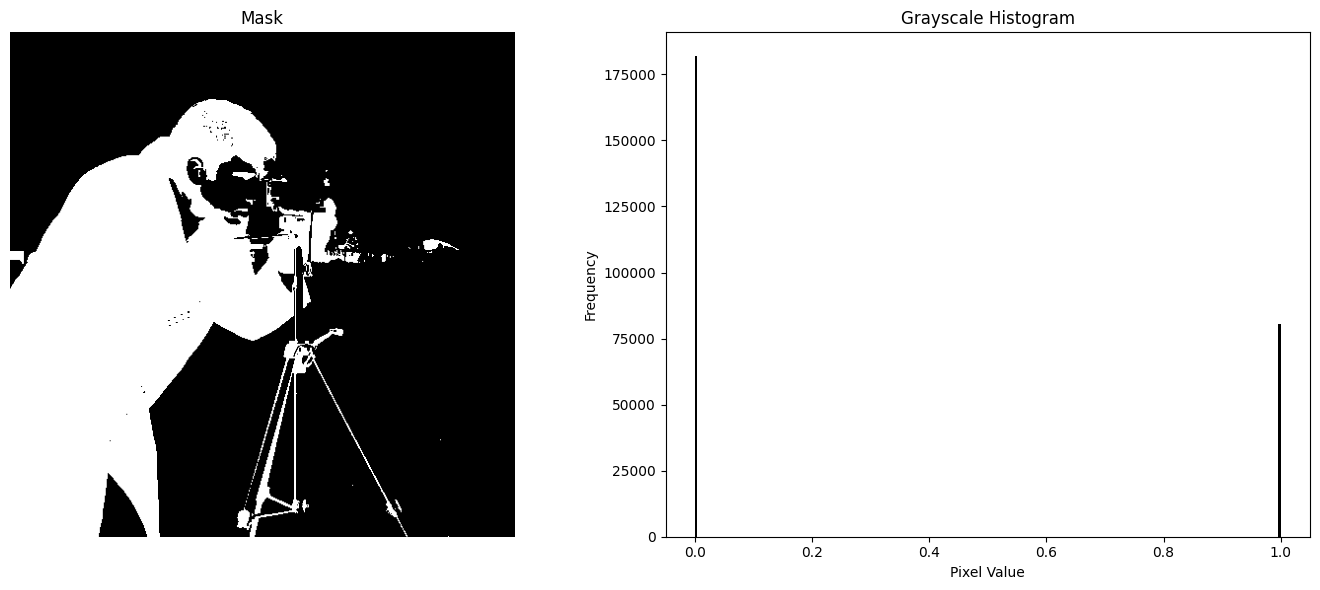

In [9]:
# The complete code will be provided during the exercise

# Geometric transformations
Geometric transformations are operations that modify the spatial properties of an image while preserving its pixel intensity values.

## Mathematical representation of affine transformations
**Many** (i.e., not all) geometric transformations can be expressed as affine transformations using a transformation matrix $ T $, which is applied to each pixel's coordinates:

$$ \begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = T \cdot \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} $$

where $ (x, y) $ are original coordinates, $ (x', y') $ are transformed coordinates, and $ T $  is a 3×3 matrix defining the transformation.  
The third coordinate (homogeneous coordinate) allows translation to be represented as a matrix multiplication.

## Examples of common transformations
### 1. Translation (Shifting)
Moves an image by a given number of pixels in the X and Y directions.
$$ T = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix} $$

### 2. Rotation
Rotates an image by an angle $ \theta $ around the origin (0,0).
$$ T = \begin{bmatrix} \cos \theta & -\sin \theta & 0 \\ \sin \theta & \cos \theta & 0 \\ 0 & 0 & 1 \end{bmatrix} $$  
To rotate around a specific point $ (x_c, y_c) $, apply translation before and after rotation:

1. Translate the point $ (x_c, y_c) $ to the origin.
2. Apply the rotation matrix.
3. Translate the origin back to $ (x_c, y_c) $.

### 3. Scaling (Resizing)
Changes the image size by factors $ s_x $ and $ s_y $.
$$ T = \begin{bmatrix} s_x & 0 & 0 \\ 0 & s_y & 0 \\ 0 & 0 & 1 \end{bmatrix} $$

### 4. Shearing (Skewing)
Tilts the image along one axis.
$$ T = \begin{bmatrix} 1 & k_x & 0 \\ k_y & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$


**Note:**  

Visit the [Affine transformation on Wikipedia](https://en.wikipedia.org/wiki/Affine_transformation) for more details.

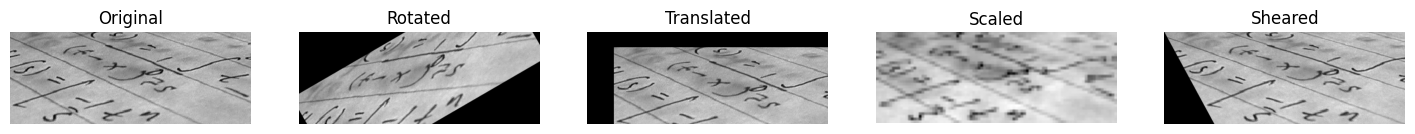

In [10]:
from skimage.transform import rotate, AffineTransform, warp, rescale

# Load an example image as numpy array, the text is already in grayscale
img_gray = data.text()

# 1. Rotate the image
# The complete code will be provided during the exercise
img_rotated = None

# 2. Translate the image
# The complete code will be provided during the exercise
img_translated = None

# 3. Scale the image
# The complete code will be provided during the exercise
img_scaled = None

# 4. Shear the image
# The complete code will be provided during the exercise
img_sheared = None

# Display all transformations
_, axes = plt.subplots(1, 5, figsize=(18, 5))
titles = ['Original', 'Rotated', 'Translated', 'Scaled', 'Sheared']
images = [img_gray, img_rotated, img_translated, img_scaled, img_sheared]
for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()

## Transformation matrix parameters detection

Parameters:
[[ 7.90153564e-01  2.84455283e+00 -1.65142095e+02]
 [-3.60320439e-01  9.23321125e-01  4.19998512e+01]
 [ 1.78343959e-04  2.46612490e-03  1.00000000e+00]]


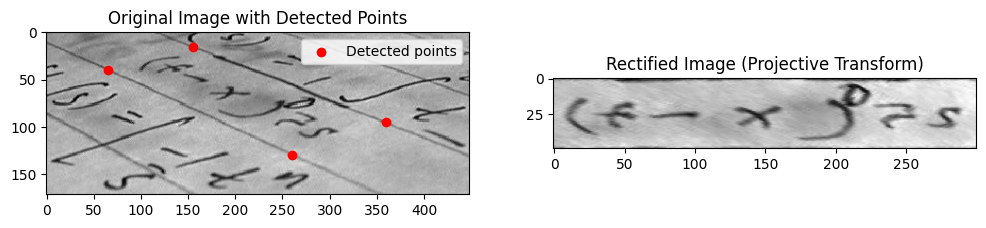

In [11]:
from skimage.transform import ProjectiveTransform, warp

# Define four source points (corners in the original image)
src = np.array([
    [155, 15],  # Top-left corner
    [65, 40],   # Top-right corner
    [260, 130], # Bottom-left corner
    [360, 95]   # Bottom-right corner
])

# Define destination points (rectified to a perfect rectangle)
dst = np.array([
    [0, 0],     # Top-left
    [0, 50],    # Top-right
    [300, 50],  # Bottom-left
    [300, 0]    # Bottom-right
])

# Compute projective transformation
# The complete code will be provided during the exercise
tform = None
print(f'Parameters:\n{tform.params}')

# Apply the transformation
# The complete code will be provided during the exercise
warped_img = None

# Plot original image with detected points
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_gray, cmap='gray')
ax[0].scatter(src[:, 0], src[:, 1], color='red', label='Detected points')
ax[0].legend()
ax[0].set_title('Original Image with Detected Points')

# Plot transformed image
ax[1].imshow(warped_img, cmap='gray')
ax[1].set_title('Rectified Image (Projective Transform)')

plt.show()